In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pickle as pkl

In [2]:
data = pd.read_csv(
    'dataset/AmritpalKaur.csv')

X = data[['Soil Moisture', 'Temperature', 'Air Humidity']]
y = data['Pump Data']

In [3]:
X['Soil Moisture'] = interp1d([X['Soil Moisture'].min(), X['Soil Moisture'].max()], [0, 100])(X['Soil Moisture'])

C:\Users\alexa\AppData\Local\Temp\ipykernel_5748\1438587549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Soil Moisture'] = interp1d([X['Soil Moisture'].min(), X['Soil Moisture'].max()], [0, 100])(X['Soil Moisture'])


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
y_pred = rf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Report: {classification_report(y_test, y_pred)}')

Accuracy: 1.0
Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       323

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



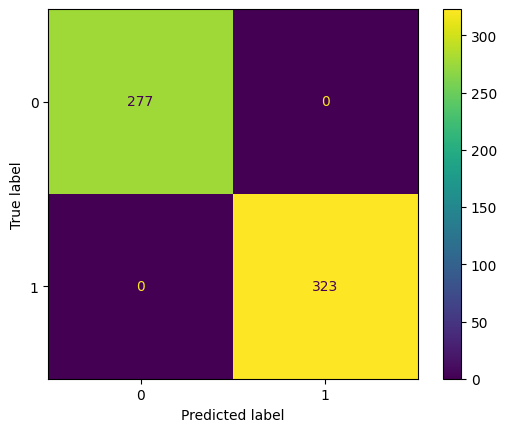

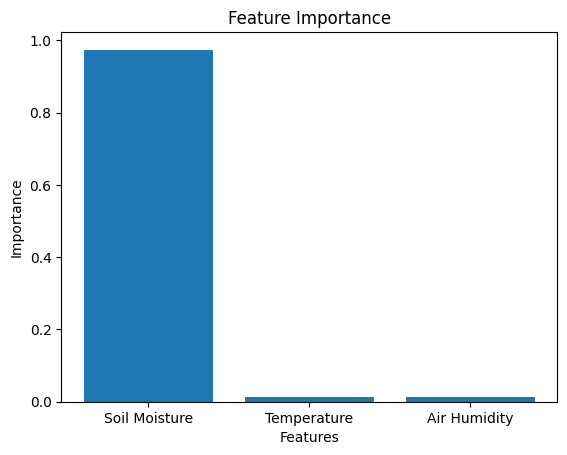

In [7]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

# Plot the feature importances
importances = rf.feature_importances_

plt.bar(X.columns, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')

plt.show()

In [10]:
model_file = 'random_forest.pkl'
file = open(model_file, 'wb')
pkl.dump(rf, file)

In [24]:
test = pd.DataFrame(
    [[55, 30, 60]],
    columns=['Soil Moisture', 'Temperature', 'Air Humidity']
)

model = pkl.load(open(model_file, 'rb'))

pred = model.predict(test)
print(pred)

[0]
